In [ ]:
import os
import random
import shutil
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Define the paths
train_dir = '/content/drive/MyDrive/animals/train'
test_dir = '/content/drive/MyDrive/animals/test'

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


# Create a generator for training data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary')  # Assuming binary classification (leopard vs. other animals)

# Print information about the generator
print("Number of images:", train_generator.samples)
print("Number of classes:", train_generator.num_classes)
print("Class indices:", train_generator.class_indices)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)
print("Number of images:", test_generator.samples)
print("Number of classes:", test_generator.num_classes)
print("Class indices:", test_generator.class_indices)



Found 1605 images belonging to 2 classes.
Number of images: 1605
Number of classes: 2
Class indices: {'Other animals': 0, 'leopard': 1}
Found 1390 images belonging to 2 classes.
Number of images: 1390
Number of classes: 2
Class indices: {'Other animals': 0, 'leopards': 1}


Found 1605 images belonging to 2 classes.
Class indices: {'Other animals': 0, 'leopard': 1}


ValueError: num must be an integer with 1 <= num <= 6, not 7

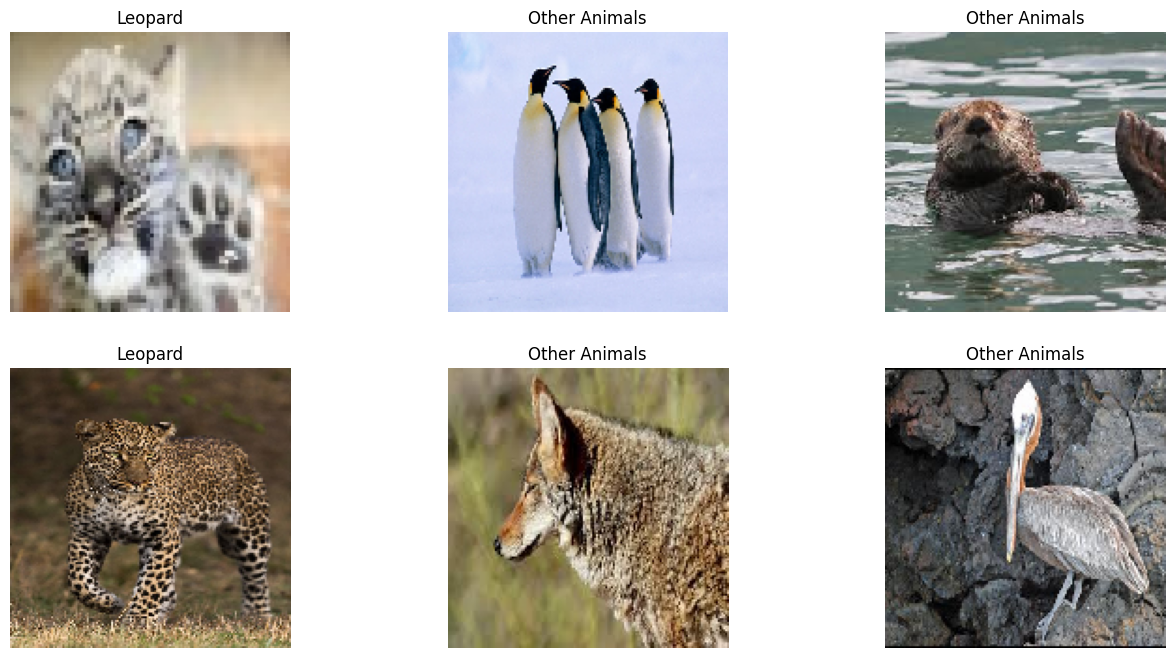

In [ ]:
# Create a generator for training data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')  # Assuming binary classification (leopard vs. other animals)

# Print class indices
print("Class indices:", train_generator.class_indices)

# Visualize sample images
leopard_indices = train_generator.class_indices['leopard']
other_animals_indices = train_generator.class_indices['Other animals']

plt.figure(figsize=(16, 8))  # Increase figure size to accommodate 2 rows and 4 columns
for i in range(3):  # Show 3 sets of images
    # Load a batch of images and labels
    images, labels = next(train_generator)

    # Find indices of leopard and other animal images in the batch
    leopard_image_indices = np.where(labels == leopard_indices)[0]
    other_animals_image_indices = np.where(labels == other_animals_indices)[0]

    # Plot sample images of leopards
    for j, leopard_index in enumerate(leopard_image_indices[:3]):  # Show 3 leopard images
        ax = plt.subplot(2, 3, i*3 + j + 1)  # Adjust subplot position
        plt.imshow(images[leopard_index])
        plt.title("Leopard")
        plt.axis("off")

    # Plot sample images of other animals
    for j, other_animals_index in enumerate(other_animals_image_indices[:3]):  # Show 3 other animal images
        ax = plt.subplot(2, 3, i*3 + j + 2)  # Adjust subplot position for second row
        plt.imshow(images[other_animals_index])
        plt.title("Other Animals")
        plt.axis("off")

plt.tight_layout()
plt.show()

In [ ]:
# Define your parameters
img_height = 224
img_width = 224
num_classes = 2

# Define your model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification (leopard vs. other animals)
])

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Set the number of epochs and batch size
epochs = 20
batch_size = 32

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=len(test_generator),
    batch_size=batch_size
)

Epoch 1/20
51/51 [==============================] - 291s 5s/step - loss: 0.3506 - accuracy: 0.9146 - val_loss: 0.2316 - val_accuracy: 0.9547
Epoch 2/20
51/51 [==============================] - 300s 6s/step - loss: 0.2412 - accuracy: 0.9371 - val_loss: 0.2214 - val_accuracy: 0.9547
Epoch 3/20
51/51 [==============================] - 310s 6s/step - loss: 0.2273 - accuracy: 0.9389 - val_loss: 0.1829 - val_accuracy: 0.9511
Epoch 4/20
51/51 [==============================] - 301s 6s/step - loss: 0.1840 - accuracy: 0.9439 - val_loss: 0.1607 - val_accuracy: 0.9532
Epoch 5/20
51/51 [==============================] - 301s 6s/step - loss: 0.1336 - accuracy: 0.9545 - val_loss: 0.1491 - val_accuracy: 0.9583
Epoch 6/20
51/51 [==============================] - 301s 6s/step - loss: 0.1149 - accuracy: 0.9620 - val_loss: 0.1489 - val_accuracy: 0.9612
Epoch 7/20
51/51 [==============================] - 274s 5s/step - loss: 0.0749 - accuracy: 0.9757 - val_loss: 0.1509 - val_accuracy: 0.9583
Epoch 8/20
51

In [ ]:
print(model.layers[-2].output_shape)

(None, 512)


In [ ]:
# Save the trained model
model.save("trained_model.h5")

In [ ]:
print(model.layers[-1].input_shape)

(None, 512)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define your parameters
img_height = 224
img_width = 224
num_classes = 2
test_batch_size = 32
target_size = (img_height, img_width)

# Create a test generator
test_generator = ImageDataGenerator(rescale=1./255)
test_generator = test_generator.flow_from_directory(test_dir,
                                                     target_size=target_size,
                                                     batch_size=test_batch_size,
                                                     class_mode='binary',
                                                     shuffle=False)

# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_generator)

print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

Found 1390 images belonging to 2 classes.
44/44 [==============================] - 59s 1s/step - loss: 0.4553 - accuracy: 0.9619
Test Loss: 0.4553299844264984
Test Accuracy: 0.9618704915046692


44/44 [==============================] - 59s 1s/step


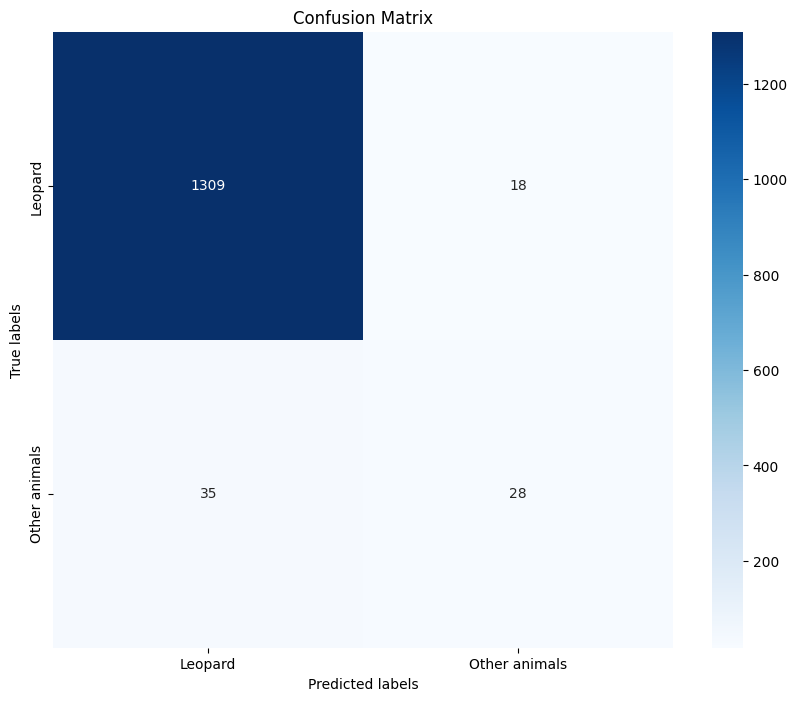

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

class_labels=['Leopard','Other animals']

# Get predictions for test data
predictions = model.predict(test_generator)
y_pred = (predictions > 0.5).astype("int32")

# Get true labels for test data
y_true = test_generator.classes

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Visualize confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
from keras.preprocessing import image
import numpy as np

# Step 1: Preprocess the image
img_path = '/content/OIP (1).jpeg'  # Replace with the path to your image
img = image.load_img(img_path, target_size=(224, 224))  # Assuming your model takes input size (224, 224)
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = img_array / 255.0  # Normalize pixel values

# Step 2: Load the trained model
from keras.models import load_model
model = load_model('path_to_your_model.h5')  # Replace with the path to your trained model

# Step 3: Predict with the model
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction, axis=1)  # Get the index of the class with the highest probability
print("Predicted class:", predicted_class)

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the trained model (assuming 'model' is your trained model object)
# Example: model = ... (loading your trained model)

# Load the image and preprocess it
img_path = '/content/OIP (1).jpeg'  # Change this to the path of your image
img = image.load_img(img_path, target_size=(224, 224))  # Adjust target_size as needed
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array /= 255.0  # Normalize pixel values

# Make predictions
predictions = model.predict(img_array)

# If it's a binary classification task, you can interpret the output
# Example for binary classification:
if predictions[0] > 0.5:
    print("The image belongs to Other animals class 1")
else:
    print("The image belongs to Leopard class 0")


1/1 [==============================] - 0s 74ms/step
The image belongs to Leopard class 0
